In [14]:
%%html
<style> table { display: inline-block } </style>

# CAB420 Assigment 2 - Model 3

| Name   | Student Number |
| :---   | :--- |
| Charmi Raval       | N10510702          |
| Leonardo Villamil  | N10411526          |
| Litian Chen        | N9646922           |
| Tace Stewart       | N9654411           |

In [15]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import visualkeras

from tensorflow import keras
from sklearn.utils import class_weight
from sklearn import preprocessing
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

## Load Data

In [16]:
# Load data
train = pd.read_csv ('Data/training.csv')
validation = pd.read_csv ('Data/validation.csv')
test = pd.read_csv ('Data/testing.csv')

In [17]:
# Split path, features and label

X_train = train.drop(['filename', 'accent'], axis=1)
path_train = train['filename'].to_numpy()
y_train = train['accent'].to_numpy()

X_val = validation.drop(['filename', 'accent'], axis=1)
path_val = validation['filename'].to_numpy()
y_val = validation['accent'].to_numpy()

X_test = test.drop(['filename', 'accent'], axis=1)
path_test = test['filename'].to_numpy()
y_test = test['accent'].to_numpy()

In [18]:
unique_train = np.unique(y_train)
unique_val = np.unique(y_val)
unique_test = np.unique(y_test)

In [19]:
# Get the label and tranform
labels = np.unique(y_train)

encoder = preprocessing.LabelEncoder()
encoder.fit(y_train)

y_train = encoder.transform(y_train)
y_val = encoder.transform(y_val)
y_test = encoder.transform(y_test)

In [20]:
# Calculation of class weights
class_weights = class_weight.compute_class_weight('balanced', np.unique(y_train), y_train)

for i in range(17):
    print('%s - class %s - weight %s\n' %(labels[i], (str(np.unique(y_train)[i])), str(class_weights[i])))

african - class 0 - weight 3.7325975166185876

australia - class 1 - weight 0.9309988842195273

bermuda - class 2 - weight 29.67098703888335

canada - class 3 - weight 1.010343344725347

england - class 4 - weight 0.31900411260902345

hongkong - class 5 - weight 13.43162328870167

indian - class 6 - weight 0.7413558308698973

ireland - class 7 - weight 5.088919288645691

malaysia - class 8 - weight 15.962810656177364

newzealand - class 9 - weight 4.769995191537105

other - class 10 - weight 1.1126620139581256

philippines - class 11 - weight 12.156862745098039

scotland - class 12 - weight 4.539122476994255

singapore - class 13 - weight 35.48489666136725

southatlandtic - class 14 - weight 71.941982272361

us - class 15 - weight 0.12046160758497954

wales - class 16 - weight 15.914438502673796

/home/leonardo/CAB420-env/lib/python3.8/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass classes=[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16], y=[15  4 15 ... 15  3  6

In [21]:
# To One-hot encode
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)

## First ANN Model

In [22]:
def eval_model(prediction, y_test, labels, history):
    y_test = np.argmax(y_test, axis=1)
    
    print('Classification Report\n')
    print(classification_report(y_test, prediction))

    print('Confusion Matrix')
    cm = confusion_matrix(y_test, prediction, normalize='true')
    fig = plt.figure(figsize=[20, 20])
    ax = fig.add_subplot(1, 1, 1)
    c = ConfusionMatrixDisplay(cm, display_labels=labels)
    c.plot(ax = ax)

    fig = plt.figure(figsize=[12, 4])
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(history.history['loss'], label="Training Loss")
    ax.plot(history.history['val_loss'], label="Validation Loss")
    ax.legend()

    ax = fig.add_subplot(1, 2, 2)
    ax.plot(history.history['accuracy'], label="Training Accuracy")
    ax.plot(history.history['val_accuracy'], label="Validation Accuracy")
    ax.legend()

    fig = plt.figure(figsize=[12, 4])
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(history.history['precision'], label="Training Precision")
    ax.plot(history.history['val_precision'], label="Validation Precision")
    ax.legend()

    ax = fig.add_subplot(1, 2, 2)
    ax.plot(history.history['recall'], label="Training Recall")
    ax.plot(history.history['val_recall'], label="Validation Recall")
    ax.legend()

In [27]:
# Define the keras model
model = Sequential()
model.add(Dense(64, input_dim=45, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(17, activation='softmax', name='output'))

print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 64)                2944      
_________________________________________________________________
dense_8 (Dense)              (None, 128)               8320      
_________________________________________________________________
output (Dense)               (None, 17)                2193      
Total params: 13,457
Trainable params: 13,457
Non-trainable params: 0
_________________________________________________________________
None


In [28]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              loss_weights=class_weights,
              metrics=['accuracy', keras.metrics.Precision(name='precision'), keras.metrics.Recall(name='recall')])

In [29]:
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/20
2790/2790 [==============================] - 5s 2ms/step - loss: 374.8509 - accuracy: 0.3097 - precision: 0.3129 - recall: 0.3022 - val_loss: 58.0613 - val_accuracy: 0.4553 - val_precision: 0.4568 - val_recall: 0.4532
Epoch 2/20
2790/2790 [==============================] - 4s 1ms/step - loss: 42.0328 - accuracy: 0.3630 - precision: 0.3894 - recall: 0.2930 - val_loss: 27.9246 - val_accuracy: 0.4345 - val_precision: 0.4529 - val_recall: 0.2070
Epoch 3/20
2790/2790 [==============================] - 4s 1ms/step - loss: 26.4774 - accuracy: 0.4322 - precision: 0.4693 - recall: 0.2507 - val_loss: 22.3773 - val_accuracy: 0.4828 - val_precision: 0.5100 - val_recall: 0.2471
Epoch 4/20
2790/2790 [==============================] - 4s 1ms/step - loss: 22.5280 - accuracy: 0.4810 - precision: 0.5109 - recall: 0.1950 - val_loss: 21.8299 - val_accuracy: 0.4860 - val_precision: 0.4167 - val_recall: 1.6802e-04
Epoch 5/20
2790/2790 [==============================] - 3s 1ms/step - loss: 21.8247

930/930 [==============================] - 1s 1ms/step - loss: 21.7629 - accuracy: 0.4921 - precision: 0.0000e+00 - recall: 0.0000e+00
Classification Report

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       465
           1       0.00      0.00      0.00      1817
           2       0.00      0.00      0.00        53
           3       0.00      0.00      0.00      1682
           4       0.00      0.00      0.00      5455
           5       0.00      0.00      0.00       133
           6       0.00      0.00      0.00      2323
           7       0.00      0.00      0.00       357
           8       0.00      0.00      0.00        97
           9       0.00      0.00      0.00       384
          10       0.00      0.00      0.00      1632
          11       0.00      0.00      0.00       135
          12       0.00      0.00      0.00       386
          13       0.00      0.00      0.00        67
          14       0.00      0.

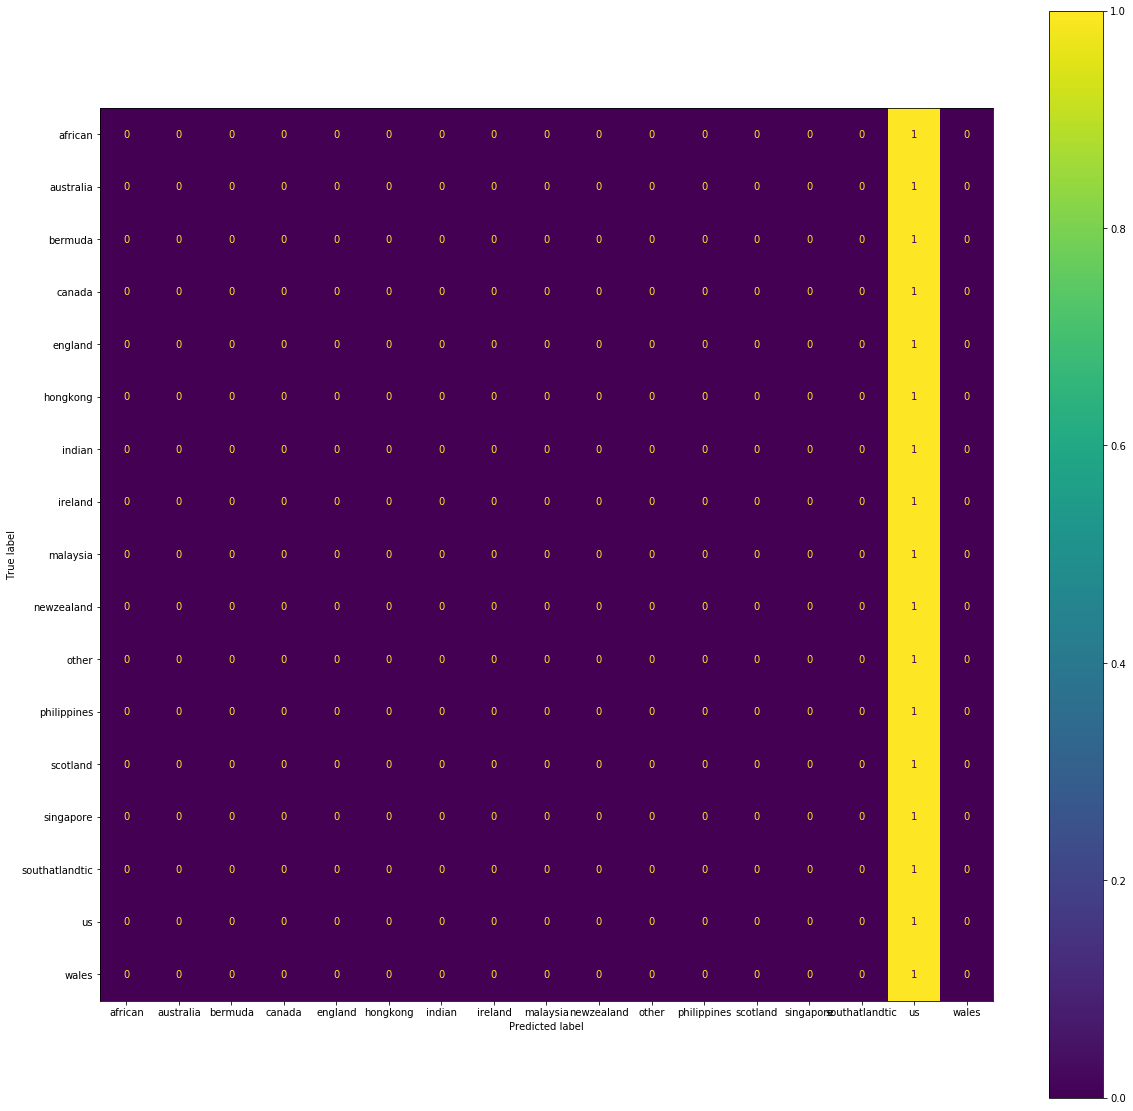

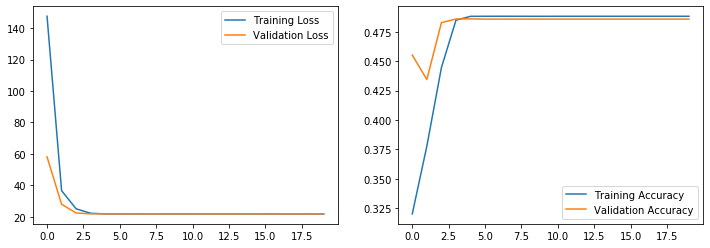

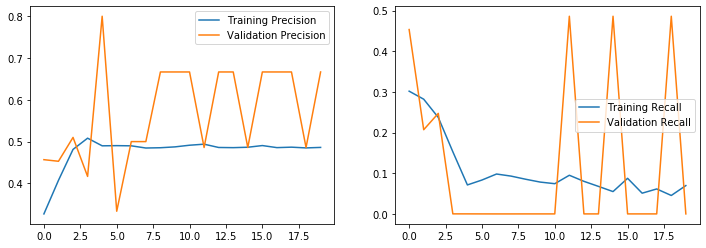

In [30]:
test_scores = model.evaluate(X_test, y_test)

prediction = model.predict(X_test)
prediction = np.argmax(prediction, axis=1)
eval_model(prediction, y_test, labels, history)

## Second ANN Model

In [23]:
# Define the keras model
model = Sequential()
model.add(Dense(64, input_dim=45, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(17, activation='softmax', name='output'))

print(model.summary())


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 64)                2944      
_________________________________________________________________
dense_3 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_4 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_5 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_6 (Dense)              (None, 64)                8256      
_________________________________________________________________
output (Dense)               (None, 17)                1105      
Total params: 86,545
Trainable params: 86,545
Non-trainable params: 0
__________________________________________________

In [24]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              loss_weights=class_weights,
              metrics=['accuracy', keras.metrics.Precision(name='precision'), keras.metrics.Recall(name='recall')])

In [25]:
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/20
2790/2790 [==============================] - 6s 2ms/step - loss: 121.2121 - accuracy: 0.3812 - precision: 0.4031 - recall: 0.2562 - val_loss: 21.8850 - val_accuracy: 0.4814 - val_precision: 0.5484 - val_recall: 0.1242
Epoch 2/20
2790/2790 [==============================] - 6s 2ms/step - loss: 22.0058 - accuracy: 0.4787 - precision: 0.5271 - recall: 0.2222 - val_loss: 21.3397 - val_accuracy: 0.4872 - val_precision: 0.5433 - val_recall: 0.2370
Epoch 3/20
2790/2790 [==============================] - 6s 2ms/step - loss: 21.4295 - accuracy: 0.4889 - precision: 0.5402 - recall: 0.2313 - val_loss: 20.9633 - val_accuracy: 0.4903 - val_precision: 0.5340 - val_recall: 0.3685
Epoch 4/20
2790/2790 [==============================] - 7s 2ms/step - loss: 20.8997 - accuracy: 0.4961 - precision: 0.5584 - recall: 0.2640 - val_loss: 20.5511 - val_accuracy: 0.5038 - val_precision: 0.6143 - val_recall: 0.1850
Epoch 5/20
2790/2790 [==============================] - 6s 2ms/step - loss: 20.5570 - a

930/930 [==============================] - 1s 976us/step - loss: 16.9178 - accuracy: 0.5879 - precision: 0.6671 - recall: 0.4507
Classification Report

              precision    recall  f1-score   support

           0       0.68      0.16      0.26       465
           1       0.74      0.19      0.31      1817
           2       0.00      0.00      0.00        53
           3       0.58      0.11      0.19      1682
           4       0.58      0.36      0.45      5455
           5       0.48      0.42      0.45       133
           6       0.57      0.33      0.42      2323
           7       0.58      0.18      0.27       357
           8       0.50      0.16      0.25        97
           9       0.44      0.08      0.14       384
          10       0.68      0.40      0.51      1632
          11       0.00      0.00      0.00       135
          12       0.40      0.27      0.32       386
          13       0.67      0.03      0.06        67
          14       0.17      0.04    

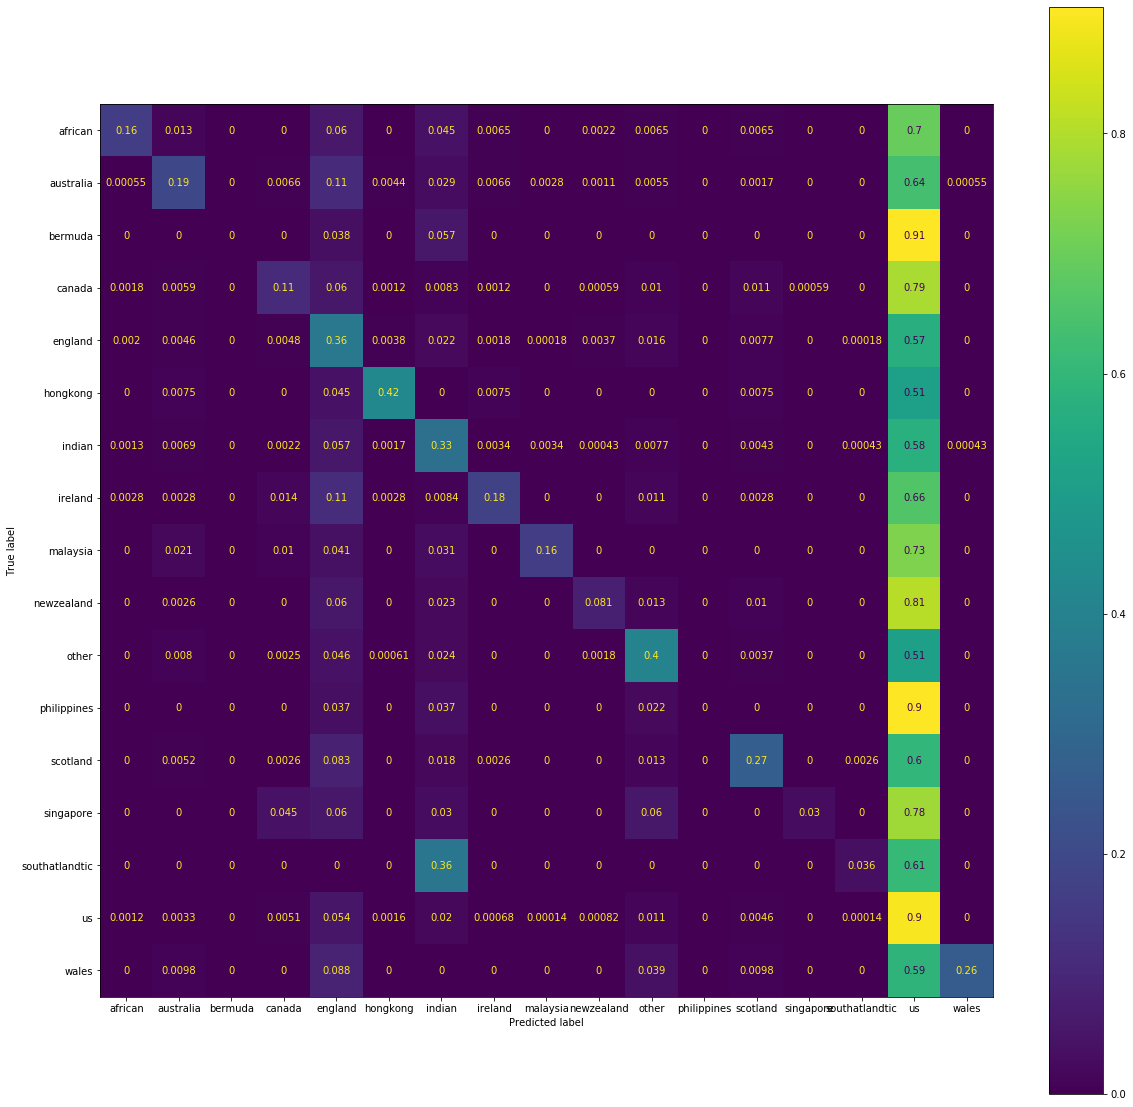

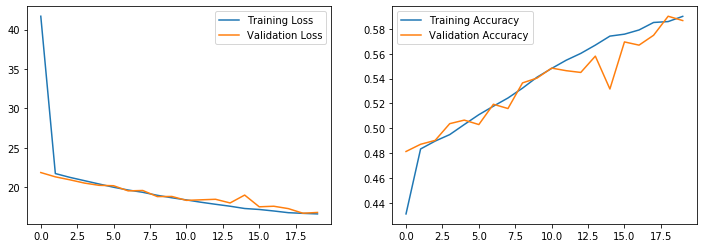

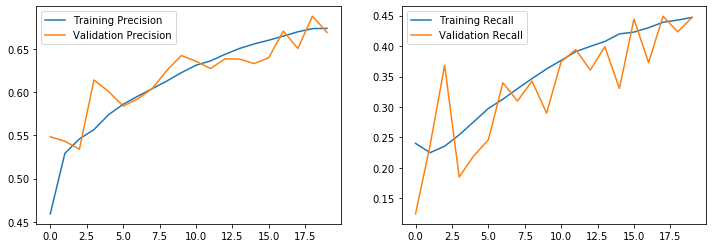

In [26]:
test_scores = model.evaluate(X_test, y_test)

prediction = model.predict(X_test)
prediction = np.argmax(prediction, axis=1)
eval_model(prediction, y_test, labels, history)